In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
UP = (-1,0)
LEFT = (0, -1)
TOPLEFT = (-1, -1)
ORIGIN = (0, 0)

def traceback_global(v, w, pointers):
    i,j = len(v), len(w)
    new_v = []
    new_w = []
    while True:
        di, dj = pointers[i][j]
        if (di,dj) == LEFT:
            new_v.append('-')
            new_w.append(w[j-1])
        elif (di,dj) == UP:
            new_v.append(v[i-1])
            new_w.append('-')
        elif (di,dj) == TOPLEFT:
            new_v.append(v[i-1])
            new_w.append(w[j-1])
        i, j = i + di, j + dj
        if (i <= 0 and j <= 0):
            break
    return ''.join(new_v[::-1])+'\n'+''.join(new_w[::-1])

def NW_global_align(v, w, delta):
    """
    Returns the score of the maximum scoring alignment of the strings v and w, as well as the actual alignment as
    computed by traceback_global.

    :param: v
    :param: w
    :param: delta
    """
    M = [[0 for j in range(len(w)+1)] for i in range(len(v)+1)]
    pointers = [[ORIGIN for j in range(len(w)+1)] for i in range(len(v)+1)]

    score, alignment = None, None
    # YOUR CODE HERE
    arrA = ["" for i in range(len(v) + 1)]
    arrB = ["" for i in range(len(w) + 1)]
    for i in range(len(v)):
      arrA[i+1] = v[i]
    for i in range(len(w)):
      arrB[i+1] = w[i]
    for i in range(len(v) + 1):
        M[i][0] = i*-1
        pointers[i][0] = UP
    for j in range(len(w) + 1):
      M[0][j] = j * -1
      pointers[0][j] = LEFT

    for i in range(1, len(v) + 1):
      for j in range(1, len(w) + 1):
        u =  M[i-1][j] + delta[arrA[i]]['-']
        l =  M[i][j-1] + delta['-'][arrB[j]]
        ul = M[i-1][j-1]+delta[arrA[i]][arrB[j]]

        if l >= u and l >= ul:
          M[i][j] = l
          pointers[i][j] = LEFT
        elif u > l and u > ul:
          M[i][j] = u
          pointers[i][j] = UP
        else:
          M[i][j] = ul
          pointers[i][j] = TOPLEFT

    pointers[0][1] = LEFT
    pointers[1][0] = UP
    score = M[len(M)-1][len(M[0])-1]
    alignment = traceback_global(v,w, pointers)
    alignment_v, alignment_w = alignment.split("\n")
    return score, alignment_v, alignment_w




In [7]:

# This function calculates the last row of scores using only linear space.
def calculate_last_row(v, w, delta):
    previous_row = [0] * (len(w) + 1)
    current_row = [0] * (len(w) + 1)
    for j in range(1, len(w) + 1):
        previous_row[j] = previous_row[j - 1] + delta['-'][w[j - 1]]

    for i in range(1, len(v) + 1):
        current_row[0] = previous_row[0] + delta[v[i - 1]]['-']
        for j in range(1, len(w) + 1):
            scores = [
                previous_row[j] + delta[v[i - 1]]['-'],  # Deletion
                current_row[j - 1] + delta['-'][w[j - 1]],  # Insertion
                previous_row[j - 1] + delta[v[i - 1]][w[j - 1]]  # Match/Mismatch
            ]
            current_row[j] = max(scores)

        previous_row, current_row = current_row, previous_row

    return previous_row

# This is the main function that applies the divide-and-conquer strategy.
def hirschberg(v, w, delta):
    #print("v, w is " + v, w)
    if len(v) == 0:
        return delta['-'][w[0]] * len(w), '-' * len(w), w
    if len(w) == 0:
        return delta[v[0]]['-'] * len(v), v, '-' * len(v)

    if len(v) == 1 or len(w) == 1:
        score, alignment_v, alignment_w = NW_global_align(v, w, delta)
        return score, alignment_v, alignment_w

    mid_v = len(v) // 2
    score_l = calculate_last_row(v[:mid_v], w, delta)
    score_r = calculate_last_row(v[mid_v:][::-1], w[::-1], delta)[::-1]

    split_w = max(range(len(w) + 1), key=lambda j: score_l[j] + score_r[j])

    score_left, left_alignment_v, left_alignment_w = hirschberg(v[:mid_v], w[:split_w], delta)
    score_right, right_alignment_v, right_alignment_w = hirschberg(v[mid_v:], w[split_w:], delta)

    return (score_left + score_right), (left_alignment_v + right_alignment_v), (left_alignment_w + right_alignment_w)

In [77]:
#Random String Generation
import random
def generateSequence(length):
  chars = ['A', 'C', 'T', 'G']
  str = ""
  for i in range(length):
    str += random.choice(chars)
  return str

a = generateSequence(250)
b = generateSequence(250)



keys = ['A', 'C', 'T', 'G', '-']
delta = {}
for i in range(len(keys)):
    delta[keys[i]] = {k : v for (k,v) in zip(keys, [1 if keys[i] == keys[j]  else -1 for j in range(len(keys))])}



In [91]:
#Test Hirschberg algorithm produces same output as Needleman Wunsch

for i in range(10, 1000, 5):
    a = generateSequence(i)
    b = generateSequence(i)
    if (hirschberg(a, b, delta) != NW_global_align(a, b, delta)):
        print("Values did not match!")

In [62]:
#initialize variables to be used in efficiency comparisons
hirschTimes = []
hirschSize = []
hirschSpace = []

NW_space = []
NW_size = []
NW_times = []


In [96]:
import tracemalloc
#Populate data for input size vs space used and input size vs time
keys = ['A', 'C', 'T', 'G', '-']
delta = {}
for i in range(len(keys)):
    delta[keys[i]] = {k : v for (k,v) in zip(keys, [1 if keys[i] == keys[j]  else -1 for j in range(len(keys))])}


for i in range(500, 5600, 250):
  #print(i)
  a = generateSequence(i)
  b = generateSequence(i)
  NW_size.append(i)
  hirschSize.append(i)

  tracemalloc.stop()
  tracemalloc.start()
  NW_start = datetime.now()
  NW_score, NW_align_w, NW_align_w = NW_global_align(a, b, delta)
  NW_end = datetime.now()
  NWcurrent, NWpeak = tracemalloc.get_traced_memory()
  #print(NWcurrent / 10**6, NWpeak / 10**6)
  tracemalloc.stop()


  tracemalloc.start()
  hirsch_start = datetime.now()
  hirschberg(a, b, delta)
  hirsch_end = datetime.now()
  Hcurrent, Hpeak = tracemalloc.get_traced_memory()
  tracemalloc.stop()


  NW_space.append(NWpeak / (10**6))
  hirschSpace.append(Hpeak / (10**6))
  
  NW_times.append((NW_end - NW_start).total_seconds())
  hirschTimes.append((hirsch_end - hirsch_start).total_seconds())



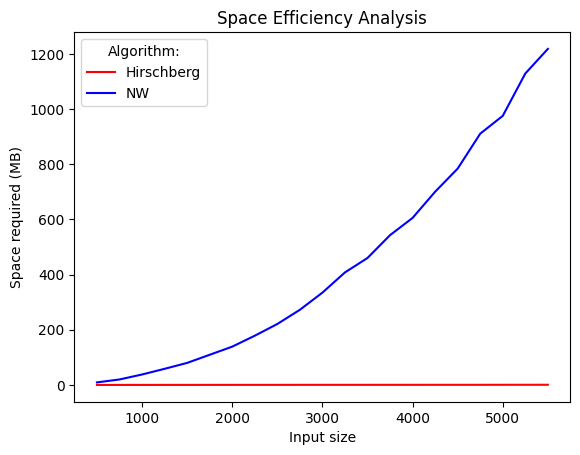

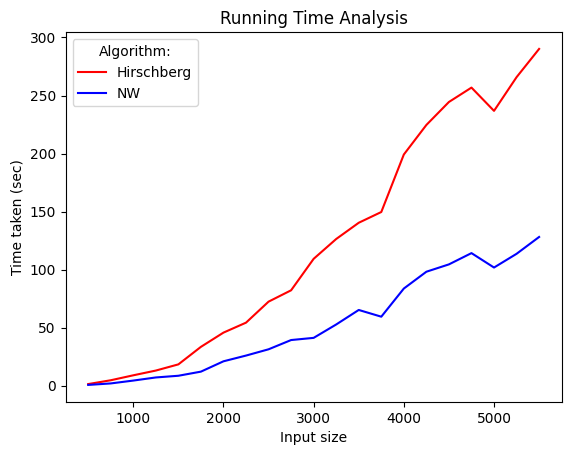

In [98]:
plt.plot(hirschSize, hirschSpace, 'red', label = 'Hirschberg')
plt.plot(NW_size, NW_space, 'blue', label = 'NW')
plt.ylabel("Space required (MB)")
plt.xlabel("Input size")
plt.legend(title='Algorithm:')
plt.title('Space Efficiency Analysis')
plt.show()


hirschSize = hirschSize[0:59]
plt.plot(hirschSize, hirschTimes, 'red', label = 'Hirschberg')
plt.plot(NW_size, NW_times, 'blue', label = 'NW')
plt.ylabel("Time taken (sec)")
plt.xlabel("Input size")
plt.legend(title='Algorithm:')
plt.title('Running Time Analysis')
plt.show()
